# <center>**Banking Loan Analytics**<center>

---

## 1. Cài đặt thư viện và Nhập Dữ Liệu

In [14]:
import zipcodes as zcode
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.model_selection import KFold
from  sklearn.model_selection import cross_val_score
import warnings
import sklearn.metrics
import ydata_profiling as pf
warnings.filterwarnings('ignore')
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
import plotly.express as pe
from sklearn import preprocessing
from scipy.integrate import quad
import ipywidgets
%matplotlib inline

Bộ dữ liệu này chứa thông tin của hơn 5.000 khách hàng. Dựa trên số điểm mà mỗi khách hàng đạt được, một khoản vay được đề xuất cho họ. Các đặc điểm (thuộc tính) trong bộ dữ liệu bao gồm:

- **Age**: Tuổi của khách hàng (tính theo số năm đã hoàn thành)

- **Experience**: Số năm kinh nghiệm làm việc chuyên môn

- **Income**: Thu nhập hàng năm của khách hàng

- **Zip code**: Mã vùng (Zip code) tại địa chỉ nhà của khách hàng

- **Family**: Quy mô gia đình của khách hàng

- **CCAvg**: Mức chi tiêu trung bình hàng tháng bằng thẻ tín dụng

- **Education**: Trình độ học vấn (Đại học = 1, Sau đại học = 2, Trình độ cao cấp = 3)

- **Mortgage**: Giá trị khoản vay thế chấp nhà (nếu có)

- **Personal_loan**: Khách hàng này có chấp nhận khoản vay cá nhân được đề nghị trong chiến dịch gần nhất không?

- **Security_account**: Khách hàng có tài khoản chứng khoán tại ngân hàng không?

- **Cd_account**: Khách hàng có tài khoản chứng chỉ tiền gửi (CD) tại ngân hàng không?

- **Online**: Khách hàng có sử dụng dịch vụ ngân hàng trực tuyến không?

- **Creditcard**: Khách hàng có sử dụng thẻ tín dụng do Universal Bank phát hành không?

In [9]:
data = pd.read_csv('E:/Banking_Loan_Analytics_SQL/Bank_Personal_Loan_Modelling.csv')
data.head()

ID  Age  Experience  Income  ZIP Code  Family  CCAvg  Education  Mortgage  \
0   1   25           1      49     91107       4    1.6          1         0   
1   2   45          19      34     90089       3    1.5          1         0   
2   3   39          15      11     94720       1    1.0          1         0   
3   4   35           9     100     94112       1    2.7          2         0   
4   5   35           8      45     91330       4    1.0          2         0   

   Personal Loan  Securities Account  CD Account  Online  CreditCard  
0              0                   1           0       0           0  
1              0                   1           0       0           0  
2              0                   0           0       0           0  
3              0                   0           0       0           0  
4              0                   0           0       0           1

In [10]:
df=pd.DataFrame(data)  
df2=df.drop(columns='ID')
df2

Age  Experience  Income  ZIP Code  Family  CCAvg  Education  Mortgage  \
0      25           1      49     91107       4    1.6          1         0   
1      45          19      34     90089       3    1.5          1         0   
2      39          15      11     94720       1    1.0          1         0   
3      35           9     100     94112       1    2.7          2         0   
4      35           8      45     91330       4    1.0          2         0   
...   ...         ...     ...       ...     ...    ...        ...       ...   
4995   29           3      40     92697       1    1.9          3         0   
4996   30           4      15     92037       4    0.4          1        85   
4997   63          39      24     93023       2    0.3          3         0   
4998   65          40      49     90034       3    0.5          2         0   
4999   28           4      83     92612       3    0.8          1         0   

      Personal Loan  Securities Account  CD Account  Online  CreditCard  
0                 0                   1           0       0           0  
1                 0                   1           0       0           0  
2                 0                   0           0       0           0  
3                 0                   0           0       0           0  
4                 0                   0           0       0           1  
...             ...                 ...         ...     ...         ...  
4995              0                   0           0       1           0  
4996              0                   0           0       1           0  
4997              0                   0           0       0           0  
4998              0                   0           0       1           0  
4999              0                   0           0       1           1  

[5000 rows x 13 columns]

Chi phí được tính theo tháng chứ không phải theo năm

In [11]:
df2['CCAvg'] = df2['CCAvg']* 12
df2.head()

Age  Experience  Income  ZIP Code  Family  CCAvg  Education  Mortgage  \
0   25           1      49     91107       4   19.2          1         0   
1   45          19      34     90089       3   18.0          1         0   
2   39          15      11     94720       1   12.0          1         0   
3   35           9     100     94112       1   32.4          2         0   
4   35           8      45     91330       4   12.0          2         0   

   Personal Loan  Securities Account  CD Account  Online  CreditCard  
0              0                   1           0       0           0  
1              0                   1           0       0           0  
2              0                   0           0       0           0  
3              0                   0           0       0           0  
4              0                   0           0       0           1

## 2. Tạo báo cáo phân tích dữ liệu tự động (EDA - Exploratory Data Analysis)
| 📊 Hạng mục             | Nội dung                                                               |
| ----------------------- | ---------------------------------------------------------------------- |
| **Tổng quan dữ liệu**   | Số dòng, cột, giá trị thiếu, kiểu dữ liệu                              |
| **Thống kê mô tả**      | Trung bình, min, max, độ lệch chuẩn, phân vị (quantile),...            |
| **Phân phối dữ liệu**   | Biểu đồ phân phối cho cột số (histogram, KDE)                          |
| **Giá trị bị thiếu**    | Biểu đồ heatmap cho missing values                                     |
| **Mối tương quan**      | Biểu đồ hệ số tương quan (correlation heatmap) giữa các biến số        |
| **Tương quan danh mục** | Tương quan giữa các cột phân loại                                      |
| **Cảnh báo tự động**    | Cảnh báo nếu có dữ liệu trùng lặp, cực trị (outlier), mất cân bằng,... |


In [17]:
pf.ProfileReport(df2,title="Báo cáo tự động về dữ liệu Banking Loan", explorative=True)

Render HTML: 100%|██████████| 1/1 [00:01<00:00,  1.00s/it]


## 3. Xử lý dữ liệu

### Kiểm tra dữ liệu bị thiếu và trùng lặp

In [19]:
df2.isnull().sum()
df2.nunique()
df2.info()
df2.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Age                 5000 non-null   int64  
 1   Experience          5000 non-null   int64  
 2   Income              5000 non-null   int64  
 3   ZIP Code            5000 non-null   int64  
 4   Family              5000 non-null   int64  
 5   CCAvg               5000 non-null   float64
 6   Education           5000 non-null   int64  
 7   Mortgage            5000 non-null   int64  
 8   Personal Loan       5000 non-null   int64  
 9   Securities Account  5000 non-null   int64  
 10  CD Account          5000 non-null   int64  
 11  Online              5000 non-null   int64  
 12  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(12)
memory usage: 507.9 KB


Age   Experience       Income      ZIP Code       Family  \
count  5000.000000  5000.000000  5000.000000   5000.000000  5000.000000   
mean     45.338400    20.104600    73.774200  93152.503000     2.396400   
std      11.463166    11.467954    46.033729   2121.852197     1.147663   
min      23.000000    -3.000000     8.000000   9307.000000     1.000000   
25%      35.000000    10.000000    39.000000  91911.000000     1.000000   
50%      45.000000    20.000000    64.000000  93437.000000     2.000000   
75%      55.000000    30.000000    98.000000  94608.000000     3.000000   
max      67.000000    43.000000   224.000000  96651.000000     4.000000   

             CCAvg    Education     Mortgage  Personal Loan  \
count  5000.000000  5000.000000  5000.000000    5000.000000   
mean     23.255256     1.881000    56.498800       0.096000   
std      20.971908     0.839869   101.713802       0.294621   
min       0.000000     1.000000     0.000000       0.000000   
25%       8.400000     1.000000     0.000000       0.000000   
50%      18.000000     2.000000     0.000000       0.000000   
75%      30.000000     3.000000   101.000000       0.000000   
max     120.000000     3.000000   635.000000       1.000000   

       Securities Account  CD Account       Online   CreditCard  
count         5000.000000  5000.00000  5000.000000  5000.000000  
mean             0.104400     0.06040     0.596800     0.294000  
std              0.305809     0.23825     0.490589     0.455637  
min              0.000000     0.00000     0.000000     0.000000  
25%              0.000000     0.00000     0.000000     0.000000  
50%              0.000000     0.00000     1.000000     0.000000  
75%              0.000000     0.00000     1.000000     1.000000  
max              1.000000     1.00000     1.000000     1.000000

### Biến Experience
Chúng ta có số âm trong lịch sử bảo hiểm, điều này là vô lý. Vì vậy, chúng ta chuyển đổi chúng thành số dương:

In [20]:
Negative1,Negative2,Negative3=df2[df2['Experience']<0]['Experience'].value_counts()
print('The number of negative data in the data set from the Experience column :')
print ('-1:',Negative1,'\n-2:',Negative2,'\n-3:',Negative3)

The number of negative data in the data set from the Experience column :
-1: 33 
-2: 15 
-3: 4


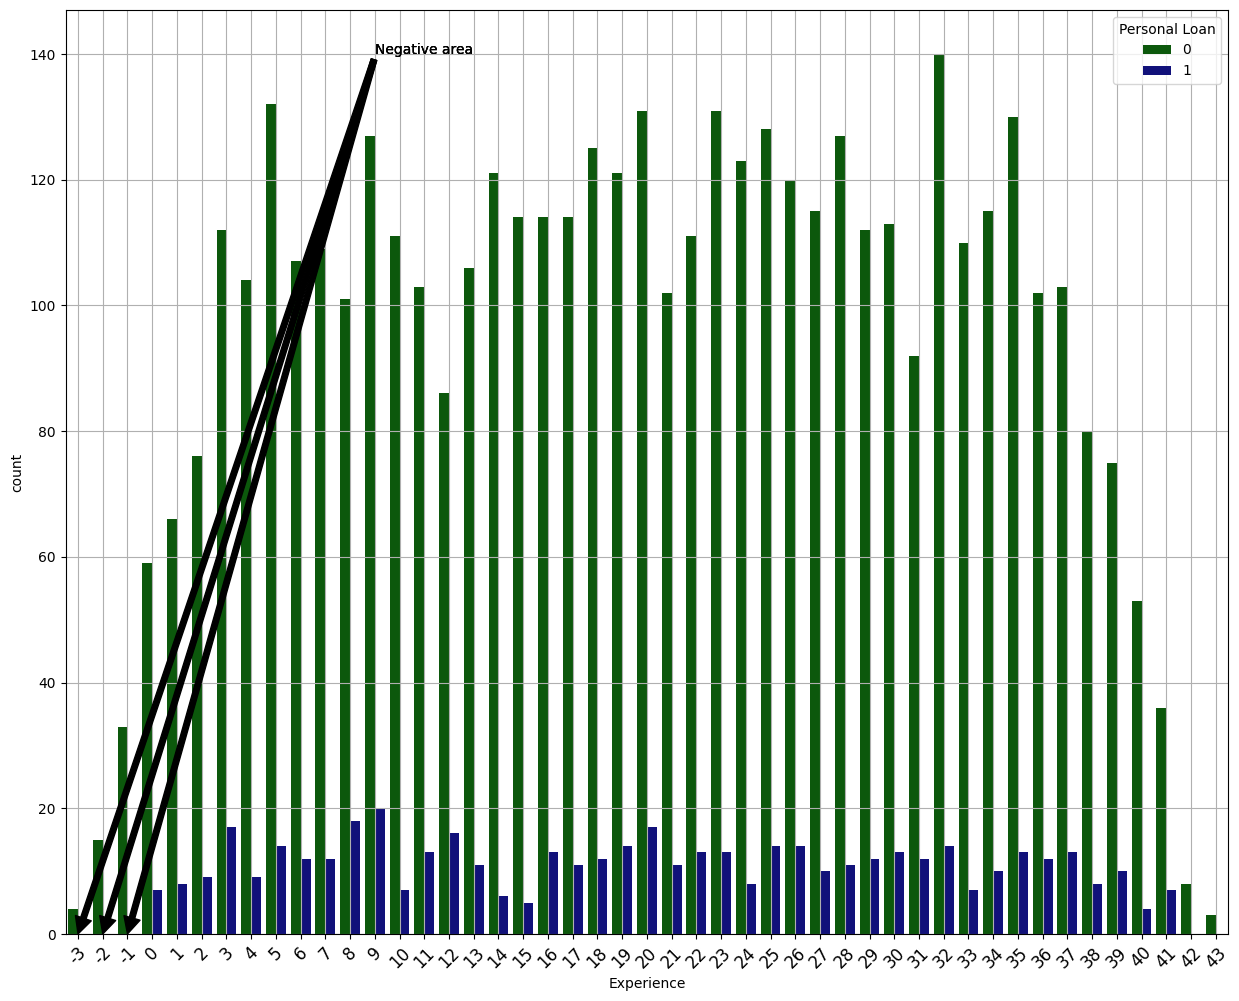

In [31]:
plt.figure(figsize=(15,12))
sns.countplot(x=df2['Experience'],hue=df2['Personal Loan'],data=df2,palette={1: 'darkblue', 0: 'darkgreen'})
plt.annotate('Negative area',xy=(2,0),xytext=(12,140),arrowprops=dict(facecolor="black",shrink=3))
plt.annotate('Negative area',xy=(1,0),xytext=(12,140),arrowprops=dict(facecolor="black",shrink=3))
plt.annotate('Negative area',xy=(0,0),xytext=(12,140),arrowprops=dict(facecolor="black",shrink=3))
plt.xticks(rotation=45,fontsize=12)
plt.grid()

<Axes: xlabel='Experience', ylabel='Density'>

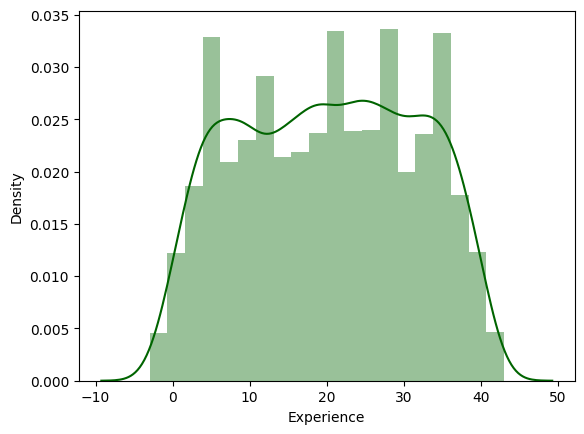

In [34]:
sns.distplot(df2['Experience'],color='darkgreen' ,bins=20)

In [35]:
df2[df2['Experience']<0].style.highlight_max(color = 'red', axis = 1,subset=['Experience'])


In [36]:
df2['Experience']=abs(df2['Experience'])
print(df2[df2['Experience'] < 0]['Experience'].value_counts())
print('Số âm chuyển thành số dương.')

Series([], Name: count, dtype: int64)
Số âm chuyển thành số dương.


### Biến Zip_code

In [37]:
print(df2['ZIP Code'].nunique())


467


In [38]:
noise=df2[(df2['ZIP Code']<20000) & (df2['Personal Loan']<.2)]
noise

Age  Experience  Income  ZIP Code  Family  CCAvg  Education  Mortgage  \
384   51          25      21      9307       4    7.2          3         0   

     Personal Loan  Securities Account  CD Account  Online  CreditCard  
384              0                   0           0       1           1

Text(0, 0.5, 'Personal Loan')

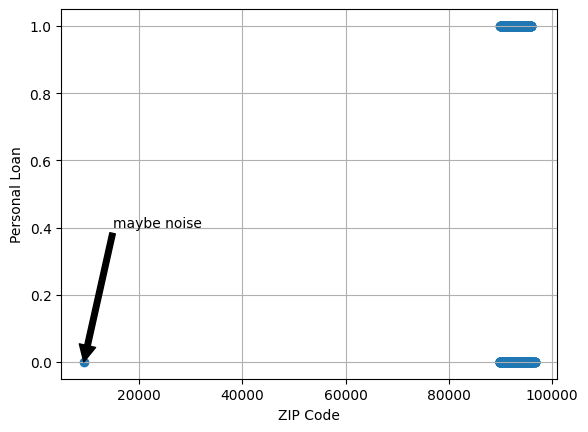

In [40]:
plt.scatter(x=df2['ZIP Code'],y=df2['Personal Loan'])
plt.annotate('maybe noise',xy=(9307,0),xytext=(15000,.4),arrowprops=dict(facecolor="black",shrink=3))
plt.grid()
plt.xlabel('ZIP Code')
plt.ylabel('Personal Loan')

In [41]:
df2.drop(index=[384],inplace=True)

### Tương quan giữa các biến

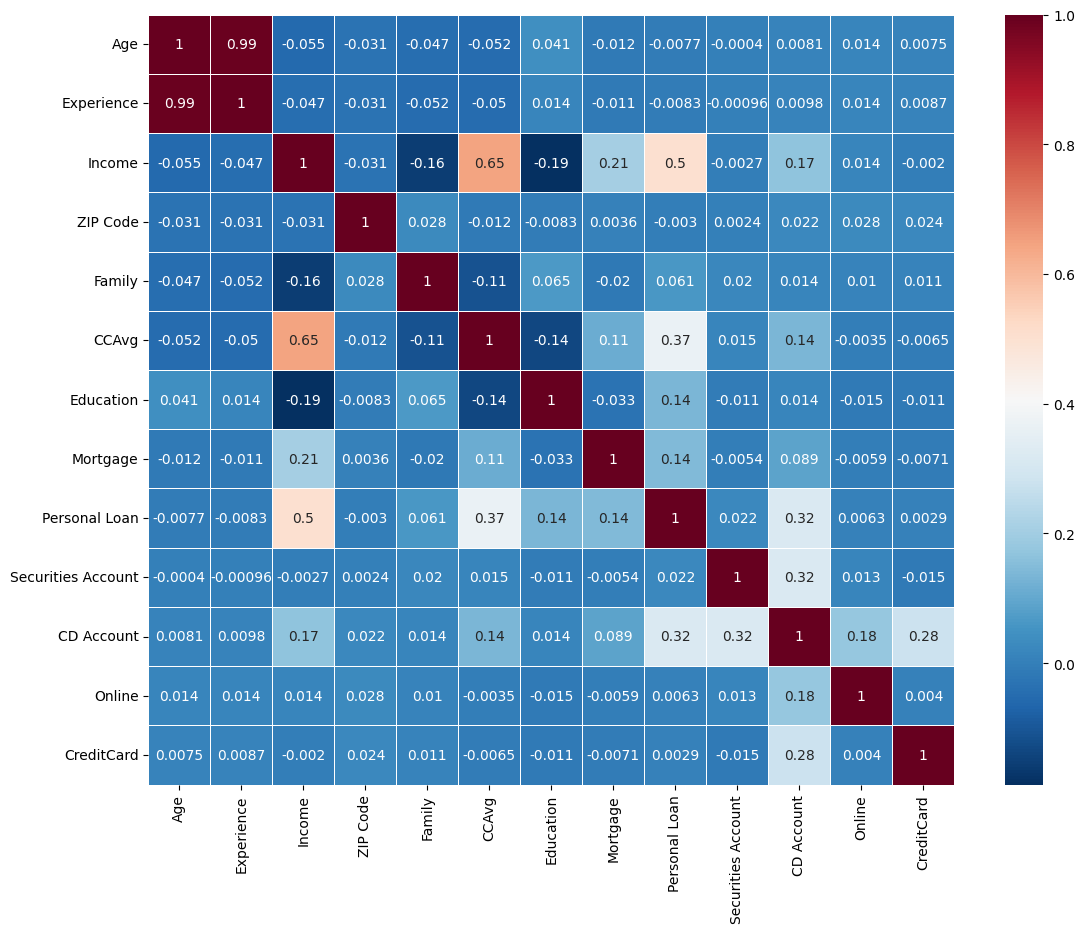

In [42]:
fig, ax = plt.subplots(figsize = (13, 10)) 
ax = sns.heatmap(df2.corr(),cmap='RdBu_r',cbar=True,annot=True,linewidths=0.5,ax=ax)
plt.show()

Text(0.5, 1.0, 'CCAvg & Incom')

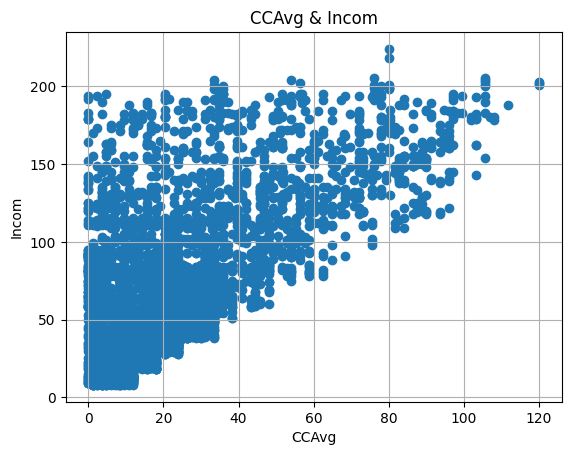

In [43]:
plt.scatter(x='CCAvg',y='Income',data=df2)
plt.grid()
plt.xlabel('CCAvg')
plt.ylabel('Incom')
plt.title('CCAvg & Incom')

<Axes: xlabel='Family', ylabel='Income'>

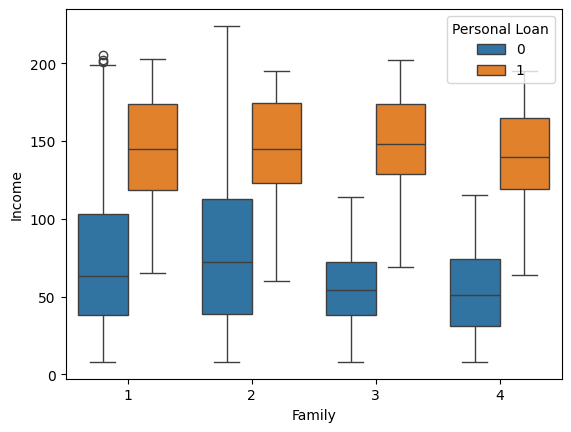

In [46]:
sns.boxplot(x=df2['Family'],y=df2['Income'],hue=df2['Personal Loan'])


<Axes: xlabel='Education', ylabel='count'>

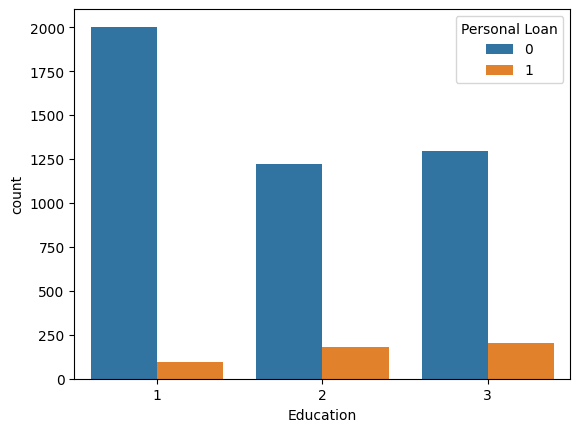

In [47]:
sns.countplot(x='Education',hue='Personal Loan',data=df2)


### Trực quan hoá kiểm tra giá trị outliers

In [ ]:
fig = pe.box(df2,x='Age', color='Personal Loan')
fig2=pe.box(df2,x='Experience',color='Personal Loan')
fig3=pe.box(df2,x='Income',color='Personal Loan')
fig4=pe.box(df2,x='ZIP Code',color='Personal Loan')
fig5=pe.box(df2,x='Family',color='Personal Loan')
fig6=pe.box(df2,x='CCAvg',color='Personal Loan')
fig7=pe.box(df2,x='Education',color='Personal Loan')
fig8=pe.box(df2,x='Mortgage',color='Personal Loan')
fig.show()
fig2.show()
fig3.show()
fig4.show()
fig5.show()
fig6.show()
fig7.show()
fig8.show()

Chúng tôi có những ngoại lệ trong biến Mortgage

In [48]:
Outlier_mortgage=df2[(df2['Mortgage']>247) & (df2['Personal Loan']==0)].style.highlight_max(color = 'red', axis = 1,subset=['Mortgage'])
Outlier_mortgage

In [49]:
Outlier_mortgage=df2[(df2['Mortgage']>483) & (df2['Personal Loan']==1)].style.highlight_max(color = 'red', axis = 1,subset=['Mortgage'])
Outlier_mortgage

Text(0.5, 1.0, 'CCAvg & Incom')

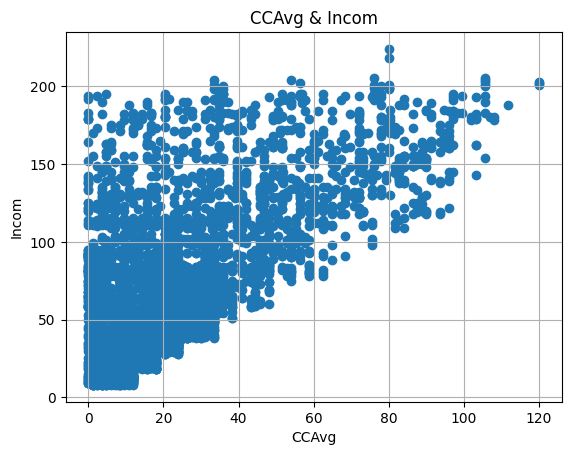

In [50]:
plt.scatter(x='CCAvg',y='Income',data=df2)
plt.grid()
plt.xlabel('CCAvg')
plt.ylabel('Incom')
plt.title('CCAvg & Incom')

Text(0.5, 0, 'Age')

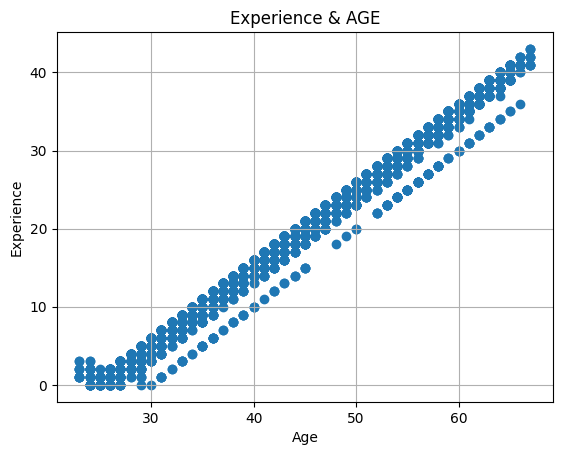

In [51]:
plt.scatter(data=df2, y='Experience',x='Age')
plt.grid()
plt.title('Experience & AGE')
plt.ylabel('Experience')
plt.xlabel('Age')

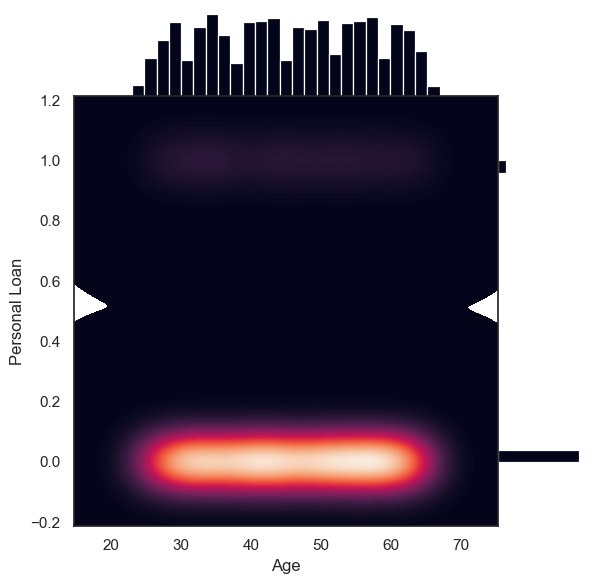

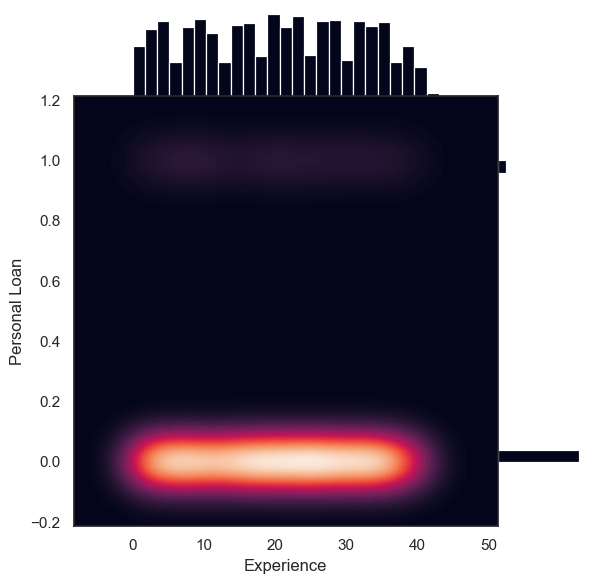

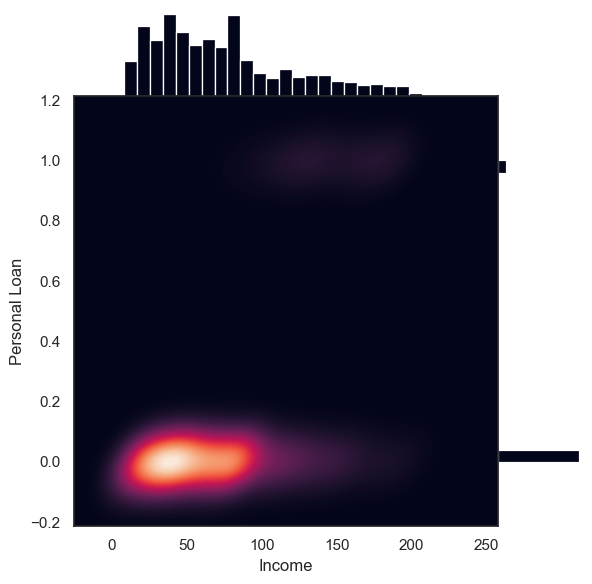

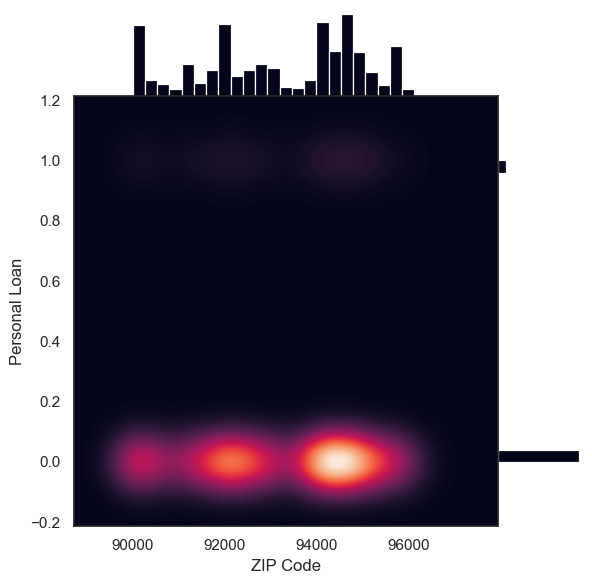

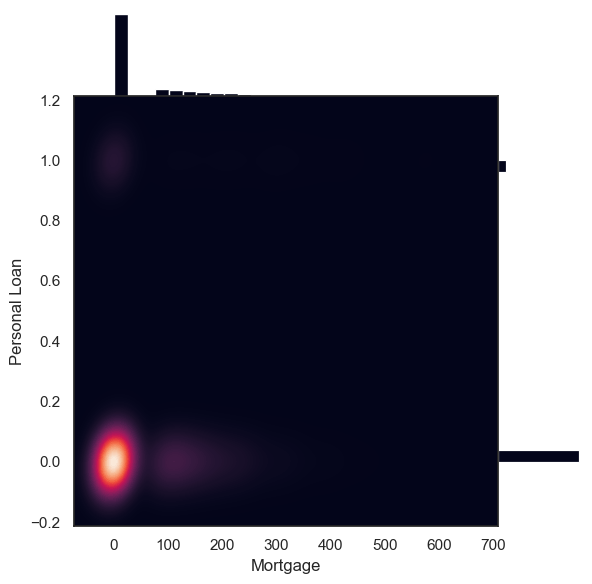

In [52]:
df_c=['Age','Experience','Income','ZIP Code','Mortgage']  
for i in df_c:
    
    sns.set_theme(style="white")
    g = sns.JointGrid(data=df2, x=i,y='Personal Loan',space=0)
    g.plot_joint(sns.kdeplot,fill=True,thresh=0, levels=100, cmap="rocket")
    g.plot_marginals(sns.histplot, color="#03051A", alpha=1, bins=25)